In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [177]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import pandas as pd
import datetime as dt
from sklearn.ensemble import RandomForestRegressor

In [3]:
# 한글 깨짐 현상을 해결
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
with open('../dataset/BIGCON_DATA_ver1.2/SK_DATA.bin', 'rb') as f:
    sk_data = pickle.load(f) 
with open('../dataset/BIGCON_DATA_ver1.2/SH_DATA.bin', 'rb') as f:
    sh_data = pickle.load(f) 
    
# sk 데이터
sk_age = sk_data['SK_AGE']
sk_time = sk_data['SK_TIME']

# sh 데이터
sh_resident = sh_data['SH_RESIDENT']
sh_foreign = sh_data['SH_FOREIGN']

* [SCORE](#SCORE)
* [sk](#sk)
* [sh](#sh)
* [corr](#corr-함수)
* [main](#main)
* [scatter plot](#scatter-plot)

## Score

In [35]:
score_data= pd.read_excel('../dataset/COVID/score_dataset.xlsx')
score_data.rename(columns= {'Unnamed: 0': 'DATE'}, inplace= True)

# SCORE

In [36]:
# covid interval 추가
# 상위 50퍼센트 미만: 0명 - 27명 1점
# 상위 50퍼센트 이상 20퍼센트 미만: 28명 - 107명 3점
# 상위 20퍼센트 이상 10퍼센트 미만: 108명 - 242명 6점
# 상위 10퍼센트 이상 5퍼센트 미만: 243명 - 505명 10점
# 상위 5퍼센트 이상: 506명 - 15점
score_data['covid_interval'] = pd.qcut(score_data.확진자수, [0,0.5,0.8,0.9,0.95,1], labels= [1,3,6,10,20])
score_data.covid_interval = score_data.covid_interval.astype('int64')

In [37]:
# 요일 추가
score_data['YO'] = score_data['DATE'].map(lambda x: x.weekday())

In [38]:
# Scoring
score_data['SCORE'] = np.log(100*score_data['covid_interval'] + 100*score_data['big'] + 10*score_data['small'])*(np.log(score_data['확진자수']+1))

In [39]:
# 유동인구 

# 2020년 전체(서울+대구)
total_sk = sksk(sk_age, False, '00')

# 2020년 서울
seoul_sk = sksk(sk_age, True, '11')

# 2020년 대구
daegu_sk = sksk(sk_age, True, '27')

In [40]:
# 매출액

# 2020년 전체(서울+대구)
total_sh = shsh(sh_resident, False, '00')

# 2020년 서울
seoul_sh = shsh(sh_resident, True, '11')

# 2020년 대구
daegu_sh = shsh(sh_resident, True, '27')

In [44]:
score_data_sh= pd.merge(score_data, total_sh.iloc[:,0:2], on='DATE')
score_data_sk= pd.merge(score_data, total_sk.iloc[:,0:2], on='DATE')

In [68]:
pd.set_option('display.max_rows', 121)
score_data_sk

,DATE,격리중,격리해제,검사중,결과음성,big,small,확진자수,covid_interval,YO,SCORE,Popul
0,2020-02-01,0,0,0,0,0,0,1,1,5,3.192061,4609346.39
1,2020-02-02,0,0,0,0,0,0,3,1,6,6.384121,3697140.59
2,2020-02-03,0,0,0,0,0,0,0,1,0,0.000000,5251030.87
3,2020-02-04,0,0,0,0,0,0,1,1,1,3.192061,5351271.40
4,2020-02-05,0,0,0,0,0,1,3,1,2,6.516249,5270566.85
5,2020-02-06,0,0,0,0,0,1,4,1,3,7.565131,5226386.92
6,2020-02-07,0,0,0,0,0,0,1,1,4,3.192061,5480067.14
7,2020-02-08,22,2,620,1057,0,0,0,1,5,0.000000,4597652.42
8,2020-02-09,22,3,960,298,0,0,3,1,6,6.384121,3730725.24
9,2020-02-10,24,3,809,585,0,0,0,1,0,0.000000,5231591.61


# Random Forest

In [231]:
RFC.feature_importances_[::-1]

array([0.00778355, 0.14867147, 0.01980142, 0.02640292, 0.17331475,
       0.08003034, 0.34033099, 0.20366456])

In [232]:
def RandomForestResult(x, y, ccp_alpha, state_num,title):
    label = x.columns
    index = np.arange(len(label))
    
    RFC = RandomForestRegressor(ccp_alpha= ccp_alpha, random_state = state_num)
    RFC.fit(x, y)
    print(RFC.feature_importances_[::-1])
    
    plt.figure(figsize= (15,8))
    plt.barh(index, RFC.feature_importances_)
    plt.yticks(index, label)
    plt.title(title, fontsize=15)
    plt.show()

## SH 변수중요도 측정하기

[0.00977703 0.1421689  0.01928512 0.02481222 0.16438523 0.08021974
 0.35667638 0.20267538]


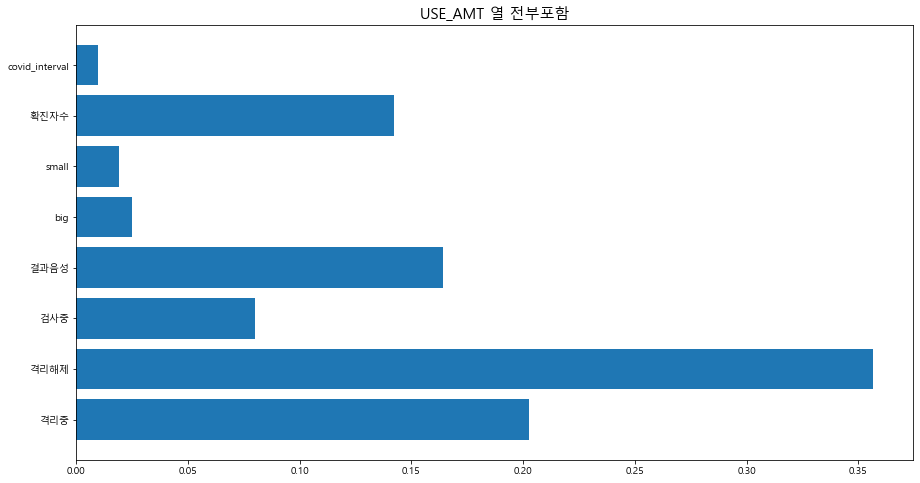

In [233]:
# 열 전부 포함
RandomForestResult(score_data_sh.iloc[:,1:9],score_data_sh.iloc[:,-1],10,2,'USE_AMT 열 전부포함')

[0.14608463 0.02394828 0.02021532 0.17164921 0.08916018 0.33633905
 0.21260333]


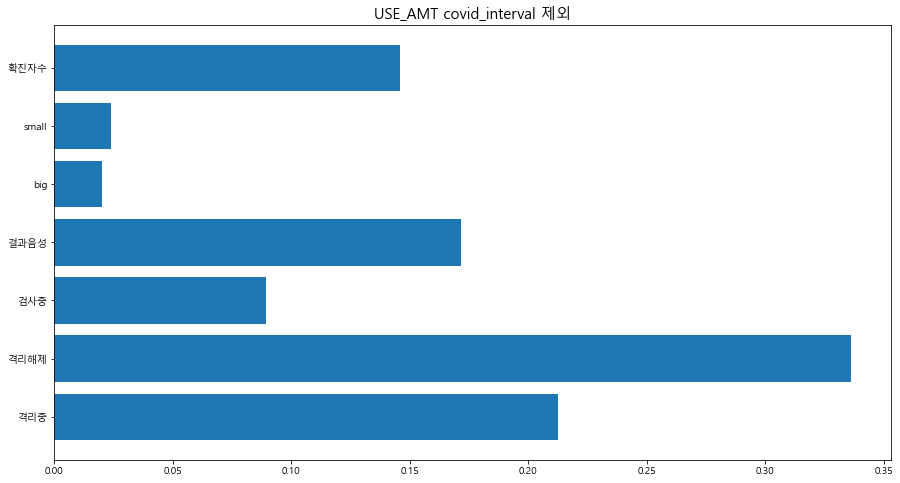

In [234]:
# covid_interval 제거
RandomForestResult(score_data_sh[['격리중','격리해제','검사중','결과음성','big','small','확진자수']],score_data_sh.iloc[:,-1],10,3,'USE_AMT covid_interval 제외')

[0.15898052 0.17395355 0.09221921 0.3710017  0.20384502]


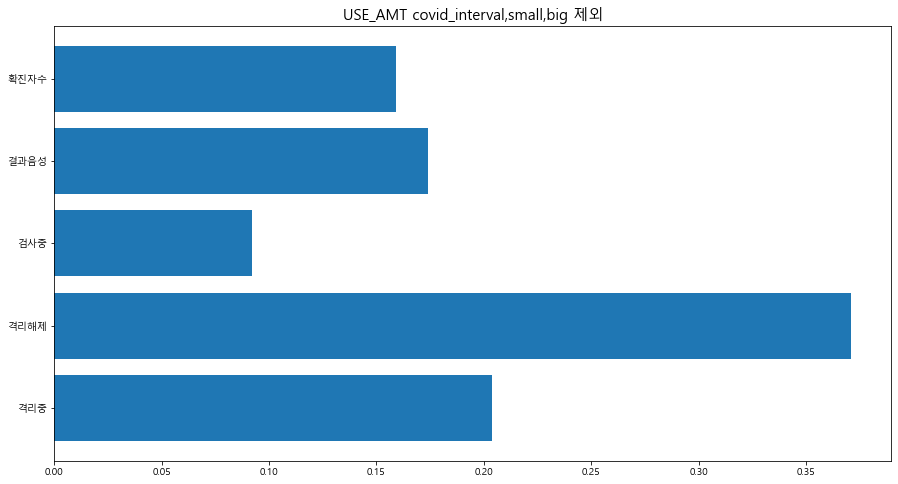

In [235]:
# covid_interval, small, big 제거
RandomForestResult(score_data_sh[['격리중','격리해제','검사중','결과음성','확진자수']],score_data_sh.iloc[:,-1],10,4,'USE_AMT covid_interval,small,big 제외')

## SK 변수중요도 측정하기

[0.01836648 0.32111027 0.03590656 0.04605832 0.13454955 0.09686601
 0.1105534  0.23658941]


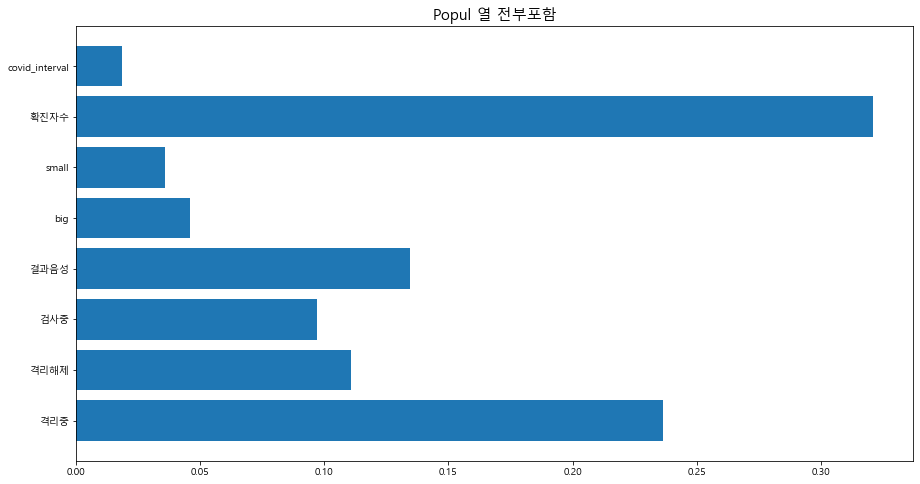

In [237]:
# 열 전부 포함
RandomForestResult(score_data_sk.iloc[:,1:9],score_data_sk.iloc[:,-1],10,5,'Popul 열 전부포함')

[0.04005125 0.03790212 0.34941342 0.13697256 0.09124445 0.12063798
 0.22377822]


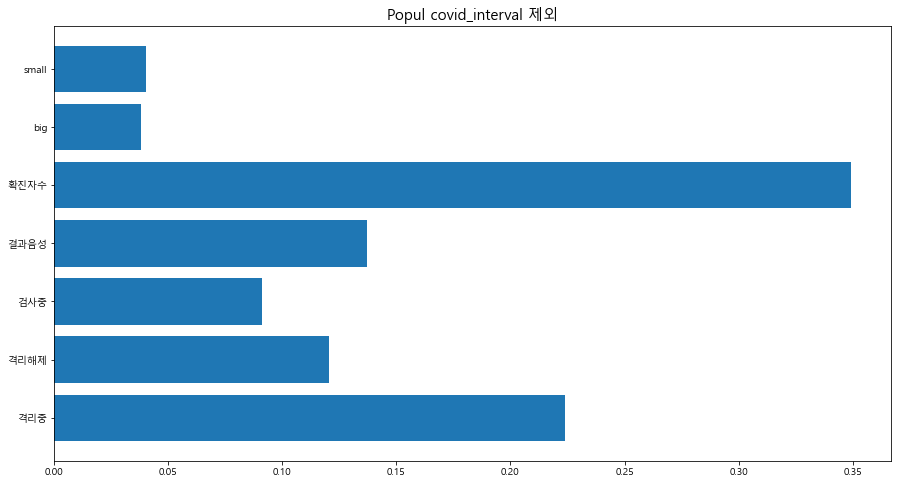

In [238]:
# covid_interval 제외
RandomForestResult(score_data_sk[['격리중','격리해제','검사중','결과음성','확진자수','big','small']],score_data_sk.iloc[:,-1],10,6,'Popul covid_interval 제외')

[0.39066696 0.15680465 0.1051443  0.11457609 0.232808  ]


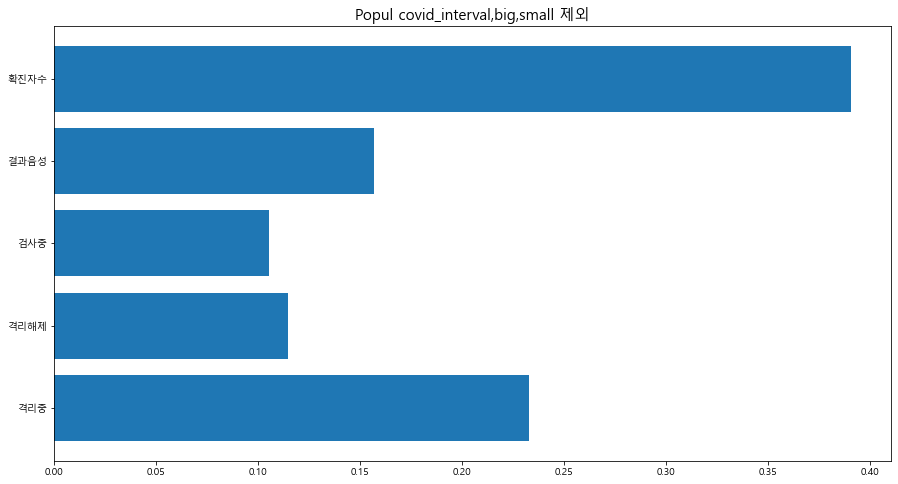

In [239]:
# covid_interval, big, small 제외
RandomForestResult(score_data_sk[['격리중','격리해제','검사중','결과음성','확진자수']],score_data_sk.iloc[:,-1],10,7,'Popul covid_interval,big,small 제외')